In [ ]:
!pip install --upgrade pandas

     |████████████████████████████████| 11.3 MB 8.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [ ]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 3.8 MB 42.1 MB/s 
     |████████████████████████████████| 503 kB 40.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=5c9e1d95880fe174cb68113fbe8135ade32b7a7f5dcd5932ebee98064180a995
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [ ]:
!pip install spacy

In [ ]:
!pip install gensim

In [ ]:
!pip install tensorflow-gpu==1.15.0

     |████████████████████████████████| 411.5 MB 6.7 kB/s 


In [ ]:
!pip install bert-tensorflow

     |████████████████████████████████| 64 kB 1.8 MB/s 


In [ ]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 6.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 3.4 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=956987fa45aa4897f11c3d1db7e46997492c86c6571220f76598366cfd1e0c4a
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompati

In [ ]:
# Importing necessary libraries and packages

import numpy as np
import pandas as pd
import spacy
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from nltk.stem import WordNetLemmatizer
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Enable logging for gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import os
n = 1000


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization
from bert import modeling
import tensorflow as tf
import numpy as np
import itertools

In [ ]:
#Importing Stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['background', 'methods', 'introduction', 'conclusions', 'results',
                   'purpose', 'materials', 'discussions','methodology','result analysis'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Input Datasets

biorxiv_df = pd.read_csv('/content/biorxiv_clean.csv')

In [ ]:
biorxiv_df.count

<bound method DataFrame.count of                                       paper_id  ...                                   raw_bibliography
0     bbf09194127619f57b3ddf5daf684593a5831367  ...  {'BIBREF0': {'ref_id': 'b0', 'title': 'Impact ...
1     2a21fdd15e07c89c88e8c2f6c6ab5692568876ec  ...  {'BIBREF0': {'ref_id': 'b0', 'title': 'In one ...
2     e686d1ce1540026ecb100c09f99ed091c139b92c  ...  {'BIBREF2': {'ref_id': 'b2', 'title': 'COVID-1...
3     c6039f8933305c9f44a44c81a15b321b6c2848dc  ...  {'BIBREF0': {'ref_id': 'b0', 'title': 'Global,...
4     073d74442e2655d79b0b3f764a627ec667ad422c  ...  {'BIBREF2': {'ref_id': 'b2', 'title': 'Early T...
...                                        ...  ...                                                ...
1620  c954675ee859e2f7b8f352a398a67469b50f05de  ...  {'BIBREF0': {'ref_id': 'b0', 'title': 'Emergen...
1621  8c79b740891714d155a31f1a4fa969f6732fd6ef  ...  {'BIBREF0': {'ref_id': 'b0', 'title': 'COVID-1...
1622  23e7355b5e4e0209f64c9d8d5772092a53

In [ ]:
biorxiv_df.text[0]

'Introduction\n\nCOVID-19, initially observed/detected in Hubei province of China during December 2019, has since spread to all but a handful countries, causing (as of the time of writing) an estimated 855,000 infections and 42,000 deaths ( [8] , March 31st). COVID-19 has a basic reproductive number, R 0 , currently estimated in the region of 2.5 -3 [5] . Social distance and general quarantine measures can reduce R 0 temporarily, but not permanently. For R 0 = 3, left unchecked COVID-19 can be expected to infect more than 90% of our community, with 30% of the population infected at the epidemic peak. Even with significant quarantine measures in place the population will not reach "herd immunity" to this virus until 2/3 of the population has gained resistance-either through vaccination, or infection and subsequent recovery.In order to place these numbers in a concrete context, a recent survey in New Zealand indicated that the country had a total of 520 ventilator machines [7] . Given th

In [ ]:
biorxiv_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,bbf09194127619f57b3ddf5daf684593a5831367,The Effectiveness of Targeted Quarantine for M...,"Alastair Jamieson-Lane, Eric Cytrnbaum",Alastair Jamieson-Lane (Carl von Ossietzky Uni...,Abstract\n\nWe model the extent to which age t...,"Introduction\n\nCOVID-19, initially observed/d...",Impact of non-pharmaceutical interventions (NP...,"[{'first': 'Alastair', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Impact ..."
1,2a21fdd15e07c89c88e8c2f6c6ab5692568876ec,Evaluation of Group Testing for SARS-CoV-2 RNA,"Nasa Sinnott-Armstrong, Daniel L Klein, Brenda...","Nasa Sinnott-Armstrong, Daniel L Klein, Brenda...",Abstract\n\nDuring the current COVID-19 pandem...,Introduction\n\nGroup testing was first descri...,"In one Italian town, we showed mass testing co...","[{'first': 'Nasa', 'middle': [], 'last': 'Sinn...","{'BIBREF0': {'ref_id': 'b0', 'title': 'In one ..."
2,e686d1ce1540026ecb100c09f99ed091c139b92c,Why estimating population-based case fatality ...,"Lucas Böttcher, Mingtao Xia, Tom Chou","Lucas Böttcher, Mingtao Xia (UCLA, 90095-1555,...",Abstract\n\nDifferent ways of calculating mort...,\n\nDifferent ways of calculating mortality ra...,"COVID-19 statistics, , , None; The Lancet, Z X...","[{'first': 'Lucas', 'middle': [], 'last': 'Böt...","{'BIBREF2': {'ref_id': 'b2', 'title': 'COVID-1..."
3,c6039f8933305c9f44a44c81a15b321b6c2848dc,Far-UVC light: A new tool to control the sprea...,"David Welch, Manuela Buonanno, Veljko Grilj, I...",David Welch (Columbia University Medical Cente...,Abstract\n\nAirborne-mediated microbial diseas...,3\n\nAirborne-mediated microbial diseases repr...,"Global, regional, and national life expectancy...","[{'first': 'David', 'middle': [], 'last': 'Wel...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Global,..."
4,073d74442e2655d79b0b3f764a627ec667ad422c,Quantifying SARS-CoV-2 transmission suggests e...,"Luca Ferretti, Chris Wymant, Michelle Kendall,...","Luca Ferretti (University of Oxford, Oxford, U...",Abstract\n\nThe newly emergent human virus SAR...,IV.\n\nEnvironmental transmission: transmissio...,"Early Transmission Dynamics in Wuhan, China, o...","[{'first': 'Luca', 'middle': [], 'last': 'Ferr...","{'BIBREF2': {'ref_id': 'b2', 'title': 'Early T..."


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30,
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

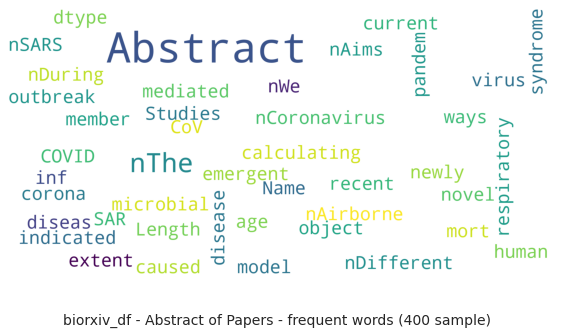

In [ ]:
show_wordcloud(biorxiv_df['abstract'], title = 'biorxiv_df - Abstract of Papers - frequent words (400 sample)')

In [ ]:
df = biorxiv_df
df = df.abstract.dropna()
data = df.values.tolist()

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(data))

print(data_words[:1])

[['abstract', 'we', 'model', 'the', 'extent', 'to', 'which', 'age', 'targeted', 'quarantine', 'can', 'be', 'used', 'to', 'reduce', 'icu', 'admissions', 'caused', 'by', 'novel', 'coronavirus', 'covid', 'using', 'demographic', 'data', 'from', 'new', 'zealand', 'we', 'demonstrate', 'that', 'lowering', 'the', 'age', 'threshold', 'for', 'quarantine', 'to', 'years', 'of', 'age', 'reduces', 'icu', 'admissions', 'drastically', 'and', 'show', 'that', 'for', 'sufficiently', 'strict', 'isolation', 'protocols', 'isolating', 'one', 'third', 'of', 'the', 'countries', 'population', 'for', 'total', 'of', 'months', 'is', 'sufficient', 'to', 'avoid', 'overwhelming', 'icu', 'capacity', 'throughout', 'the', 'entire', 'course', 'of', 'the', 'epidemic', 'similar', 'results', 'are', 'expected', 'to', 'hold', 'for', 'other', 'countries', 'though', 'some', 'minor', 'adaption', 'will', 'be', 'required', 'based', 'on', 'local', 'age', 'demographics', 'and', 'hospital', 'facilities', 'cc', 'by', 'international', 

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=20) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=20)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['abstract', 'during', 'the', 'current_covid_pandemic', 'testing', 'kit', 'and', 'rna_extraction', 'kit', 'availability', 'has_become', 'major', 'limiting', 'factor', 'in', 'the', 'ability', 'to', 'determine', 'patient', 'disease', 'status', 'and', 'accurately', 'quantify', 'prevalence', 'current', 'testing', 'strategies', 'rely_on', 'individual', 'tests', 'of', 'cases', 'matching', 'restrictive', 'diagnostic', 'criteria', 'to', 'detect', 'sars_cov', 'rna', 'limiting', 'testing', 'of', 'asymptomatic', 'and', 'mild_cases', 'testing', 'these', 'individuals', 'is', 'one', 'effective', 'way', 'to', 'understand', 'and', 'reduce', 'the', 'spread', 'of', 'covid', 'here_we', 'develop', 'pooled', 'testing', 'strategy', 'to', 'identify', 'these', 'low', 'risk', 'individuals', 'drawing', 'on', 'the', 'well_studied', 'group', 'testing', 'literature', 'modeling', 'suggests', 'practical', 'changes', 'to', 'testing', 'protocols', 'which', 'can', 'reduce', 'test', 'costs', 'and', 'stretch', 'limited',

In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[1])

['abstract', 'current', 'covid_pandemic', 'testing', 'kit', 'kit', 'availability', 'become', 'major', 'limiting', 'factor', 'ability', 'determine', 'patient', 'disease', 'status', 'accurately', 'quantify', 'prevalence', 'current', 'testing', 'strategy', 'rely', 'individual', 'test', 'case', 'match', 'restrictive', 'diagnostic', 'criterion', 'detect', 'limit', 'test', 'asymptomatic', 'mild', 'case', 'test', 'individual', 'effective', 'way', 'understand', 'reduce', 'spread', 'develop', 'pool', 'testing', 'strategy', 'identify', 'low', 'risk', 'individual', 'draw', 'well', 'study', 'group', 'testing', 'literature', 'modeling', 'suggest', 'practical', 'change', 'test', 'protocol', 'reduce', 'test', 'cost', 'stretch', 'limited', 'test_kit', 'supply', 'test', 'negative', 'pooling', 'reduce', 'total_number', 'test', 'fold', 'prevalence', 'fold', 'prevalence', 'current', 'randomize', 'group', 'testing', 'optimize', 'country', 'could', 'double', 'number', 'test', 'individual', 'use', 'test', 's

In [ ]:
print(data_lemmatized[:1])

[['model', 'extent', 'age', 'target', 'quarantine', 'use', 'reduce', 'cause', 'use', 'demographic', 'datum', 'demonstrate', 'lower', 'age', 'threshold', 'quarantine', 'year', 'age', 'reduce', 'drastically', 'show', 'sufficiently', 'strict', 'isolation', 'protocol', 'isolate', 'third', 'country', 'population', 'total', 'month', 'sufficient', 'avoid', 'overwhelming', 'icu_capacity', 'entire', 'course', 'epidemic', 'similar', 'expect', 'hold', 'country', 'minor', 'adaption', 'require', 'base', 'local', 'age', 'demographic', 'hospital', 'facility', 'made_available', 'license', 'display', 'preprint', 'perpetuity', 'copyright_holder', 'preprint']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 4), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 2), (36, 2), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1)]]


In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('adaption', 1),
  ('age', 4),
  ('avoid', 1),
  ('base', 1),
  ('cause', 1),
  ('copyright_holder', 1),
  ('country', 2),
  ('course', 1),
  ('datum', 1),
  ('demographic', 2),
  ('demonstrate', 1),
  ('display', 1),
  ('drastically', 1),
  ('entire', 1),
  ('epidemic', 1),
  ('expect', 1),
  ('extent', 1),
  ('facility', 1),
  ('hold', 1),
  ('hospital', 1),
  ('icu_capacity', 1),
  ('isolate', 1),
  ('isolation', 1),
  ('license', 1),
  ('local', 1),
  ('lower', 1),
  ('made_available', 1),
  ('minor', 1),
  ('model', 1),
  ('month', 1),
  ('overwhelming', 1),
  ('perpetuity', 1),
  ('population', 1),
  ('preprint', 2),
  ('protocol', 1),
  ('quarantine', 2),
  ('reduce', 2),
  ('require', 1),
  ('show', 1),
  ('similar', 1),
  ('strict', 1),
  ('sufficient', 1),
  ('sufficiently', 1),
  ('target', 1),
  ('third', 1),
  ('threshold', 1),
  ('total', 1),
  ('use', 2),
  ('year', 1)]]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True
                                        )

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.035*"model" + 0.016*"datum" + 0.015*"use" + 0.012*"transmission" + '
  '0.012*"study" + 0.008*"predict" + 0.008*"disease" + 0.008*"prediction" + '
  '0.008*"population" + 0.007*"propose"'),
 (1,
  '0.033*"cell" + 0.019*"expression" + 0.015*"tissue" + 0.012*"induce" + '
  '0.012*"response" + 0.010*"mouse" + 0.009*"gene" + 0.009*"effect" + '
  '0.007*"diameter" + 0.007*"suppress"'),
 (2,
  '0.061*"patient" + 0.018*"covid" + 0.016*"level" + 0.012*"study" + '
  '0.011*"group" + 0.011*"preprint" + 0.011*"year" + 0.010*"symptom" + '
  '0.009*"disease" + 0.009*"day"'),
 (3,
  '0.021*"sequence" + 0.015*"sample" + 0.013*"viral" + 0.011*"use" + '
  '0.010*"genome" + 0.008*"denv" + 0.007*"tool" + 0.007*"bat" + '
  '0.007*"process" + 0.006*"detect"'),
 (4,
  '0.035*"virus" + 0.022*"protein" + 0.011*"viral" + 0.010*"host" + '
  '0.010*"human" + 0.009*"cell" + 0.009*"show" + 0.008*"infection" + '
  '0.008*"also" + 0.007*"receptor"'),
 (5,
  '0.023*"use" + 0.014*"test" + 0.014*"drug" + 0.01

In [ ]:
#Perplexity and Coherence Scores of LDA Model

print('\nLatent Dirichlet Allocation')

print('\nModel Perplexity: ', lda_model.log_perplexity(corpus))

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Latent Dirichlet Allocation

Model Perplexity:  -7.770555828532179

Coherence Score:  0.45341809439651626


In [ ]:

pyLDAvis.enable_notebook()


In [ ]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.039965  0.072106       1        1  22.386685
7      0.185843  0.068887       2        1  18.025776
2      0.145422  0.095210       3        1  16.806620
0      0.142871 -0.051412       4        1  15.038884
5      0.080450 -0.128173       5        1  12.359743
3     -0.101864 -0.226822       6        1   8.201805
1     -0.219945  0.216761       7        1   4.939889
6     -0.272742 -0.046557       8        1   2.240598, topic_info=              Term         Freq        Total Category  logprob  loglift
92         patient  1643.000000  1643.000000  Default  30.0000  30.0000
28           model  1092.000000  1092.000000  Default  29.0000  29.0000
787           cell   572.000000   572.000000  Default  28.0000  28.0000
1111       protein   794.000000   794.000000  Default  27.0000  27.0000
220          virus  1482.000000  1482.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
1625      capacity    40.543765    81.318169   Topic8  -4.4779   3.1024
1042         phase    33.389044    64.952097   Topic8  -4.6720   3.1330
808   surveillance    28.853854    85.280026   Topic8  -4.8180   2.7147
1256          lack    29.283524   100.463301   Topic8  -4.8032   2.5657
354          whole    18.543329    50.285717   Topic8  -5.2602   2.8008

[487 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2189      1  0.577186       ace
2189      5  0.212027       ace
2189      7  0.206138       ace
2900      7  0.966797      acid
850       1  0.934254  activity
...     ...       ...       ...
1421      5  0.982008      word
4209      6  0.985414  workflow
3452      8  0.947368       www
48        2  0.126895      year
48        3  0.870135      year

[837 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 3, 1, 6, 4, 2, 7])

In [ ]:
pyLDAvis.save_html(vis, './lda4topics_v2.html')

In [ ]:
optimal_model = lda_model

model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.035*"model" + 0.016*"datum" + 0.015*"use" + 0.012*"transmission" + '
  '0.012*"study" + 0.008*"predict" + 0.008*"disease" + 0.008*"prediction" + '
  '0.008*"population" + 0.007*"propose" + 0.007*"time" + 0.007*"individual" + '
  '0.007*"parameter" + 0.006*"temperature" + 0.006*"number" + 0.006*"also" + '
  '0.006*"estimate" + 0.006*"change" + 0.006*"network" + 0.005*"mean"'),
 (1,
  '0.033*"cell" + 0.019*"expression" + 0.015*"tissue" + 0.012*"induce" + '
  '0.012*"response" + 0.010*"mouse" + 0.009*"gene" + 0.009*"effect" + '
  '0.007*"diameter" + 0.007*"suppress" + 0.005*"level" + 0.005*"cellular" + '
  '0.005*"stress" + 0.005*"heat" + 0.005*"uncertainty" + 0.005*"agent" + '
  '0.005*"sar" + 0.005*"pathway" + 0.005*"infection" + 0.005*"forager"'),
 (2,
  '0.061*"patient" + 0.018*"covid" + 0.016*"level" + 0.012*"study" + '
  '0.011*"group" + 0.011*"preprint" + 0.011*"year" + 0.010*"symptom" + '
  '0.009*"disease" + 0.009*"day" + 0.009*"clinical" + 0.009*"infection" + '
  '0.00

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

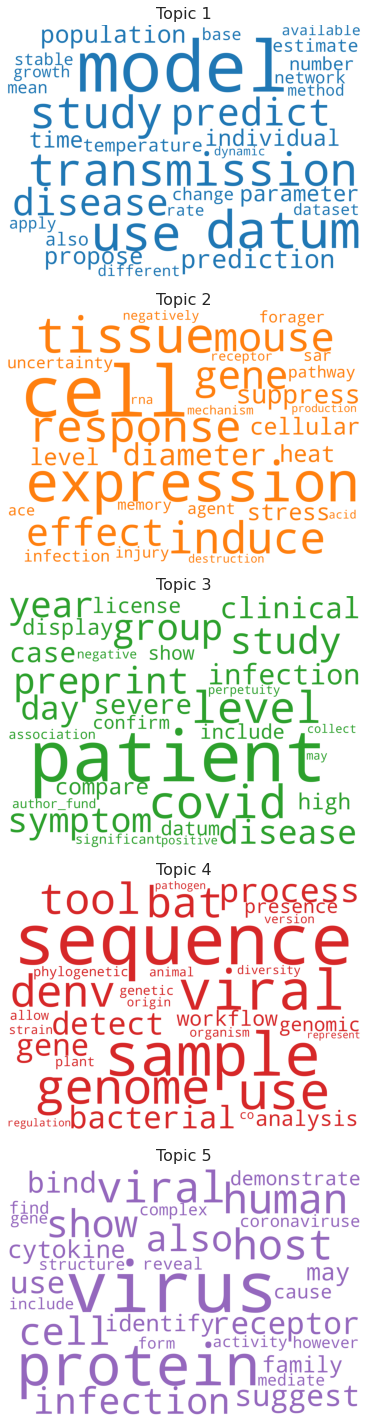

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False,
                               num_words=30)

fig, axes = plt.subplots(5, 1, figsize=(10,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=500)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i + 1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

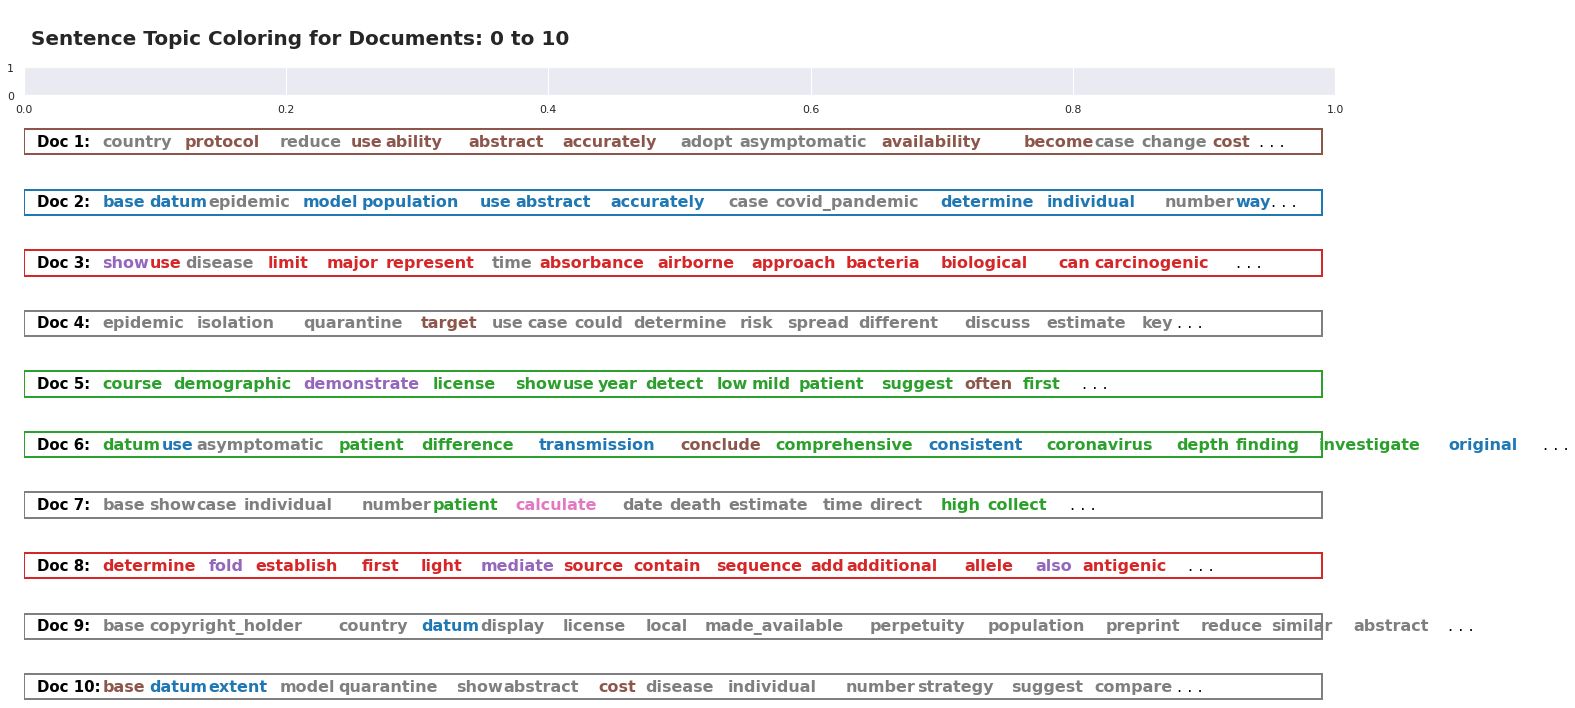

In [ ]:
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 12):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(22, 10))
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 1:
            #i = i+1
            corp_cur = corp[i-1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=15, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += 0.009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=20, x = 0.2, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

In [ ]:
corp = corpus[0:13]
corp_cur = corp[13-1]
topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
word_dominanttopic

[('age', 2),
 ('copyright_holder', 2),
 ('display', 2),
 ('hospital', 2),
 ('license', 2),
 ('made_available', 2),
 ('model', 0),
 ('perpetuity', 2),
 ('preprint', 2),
 ('show', 2),
 ('use', 5),
 ('could', 5),
 ('factor', 2),
 ('identify', 5),
 ('low', 2),
 ('patient', 2),
 ('risk', 2),
 ('study', 2),
 ('associate', 2),
 ('date', 0),
 ('difference', 2),
 ('different', 2),
 ('mortality', 2),
 ('probability', 0),
 ('establish', 2),
 ('need', 5),
 ('cc', 2),
 ('clinical', 2),
 ('recently', 2),
 ('remain', 2),
 ('account', 0),
 ('admission', 2),
 ('agreement', 5),
 ('backwards', 5),
 ('calibration', 2),
 ('clinician', 2),
 ('cohort', 2),
 ('dataset', 0),
 ('development', 5),
 ('dimer', 2),
 ('discrimination', 5),
 ('easy', 5),
 ('excellent', 5),
 ('externally', 0),
 ('include', 2),
 ('internal', 5),
 ('internally', 0),
 ('involve', 2),
 ('lancet', 5),
 ('measurement', 5),
 ('multivariable', 2),
 ('observed', 5),
 ('plot', 5),
 ('predict', 0),
 ('prediction', 0),
 ('press', 5),
 ('profile',

In [ ]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False)
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

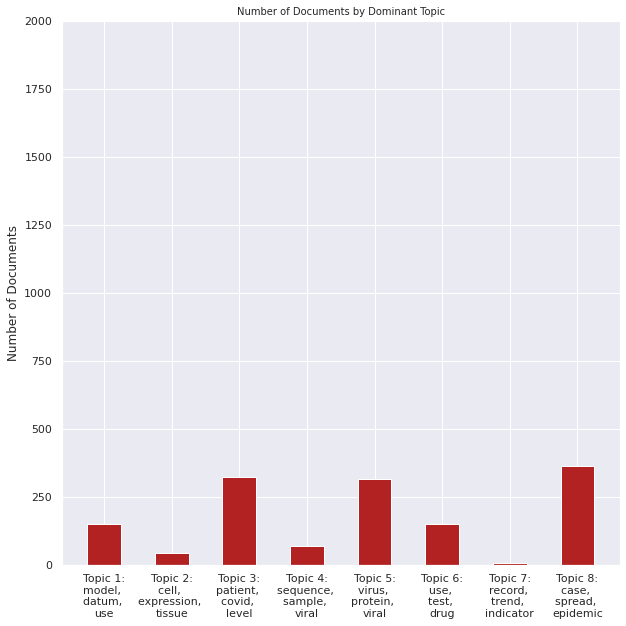

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot

fig, ax1  = plt.subplots(1, figsize=(10, 10))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x + 1)+ ':\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 2000)

plt.show()

In [ ]:
df_dominant_topic_in_each_doc

,Dominant_Topic,count
0,0,149
1,1,44
2,2,321
3,3,67
4,4,313
5,5,148
6,6,4
7,7,363


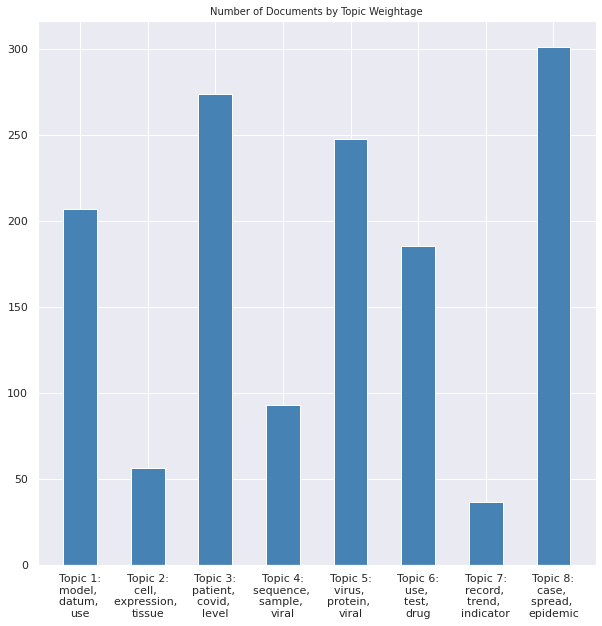

In [ ]:
fig, ax2  = plt.subplots(1, figsize=(10, 10))
# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [ ]:
from bokeh.models import HoverTool
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])


plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics),
              plot_width=800, plot_height=600)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1211 samples in 0.001s...
[t-SNE] Computed neighbors for 1211 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1211
[t-SNE] Computed conditional probabilities for sample 1211 / 1211
[t-SNE] Mean sigma: 0.101672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.735100
[t-SNE] KL divergence after 1000 iterations: 0.618885


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

    # # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

    # # Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['model extent age target quarantine can use reduce icu admission cause novel use demographic datum demonstrate lower age threshold quarantine year age reduce icu admission drastically show sufficiently strict isolation protocol isolate third country population total month sufficient avoid overwhelming icu capacity entire course epidemic similar result expect hold other country minor adaption will require base local age demographic hospital facility cc international license make available author funder grant medrxiv license display preprint perpetuity peer review copyright holder preprint', 'abstract current covid pandemic testing kit kit availability become major limiting factor ability determine patient disease status accurately quantify prevalence current testing strategy rely individual test case match restrictive diagnostic criterion detect limit testing asymptomatic mild case test individual effective way understand reduce spread here develop pool testing strategy identify low ri

In [ ]:
vectorizer = CountVectorizer(analyzer='word', min_df=10,
                              stop_words='english',
                              lowercase=True,
                              token_pattern='[a-zA-Z0-9]{3,}'
                              # max_features=50000,
                             )
data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [ ]:

search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation(n_jobs=-1)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)


# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(n_jobs=-1),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [10, 15, 20, 25, 30]})

In [ ]:
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Parameters: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Parameters:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -230696.2989508675
Model Perplexity:  765.4409322704226


In [ ]:
categories = list(df.Dominant_Topic.unique())
categories

[7, 5, 0, 3, 2, 4, 1, 6]